# Data Analysis without Feature Engineering

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [237]:
#categorical features
# nominal features - survived, name, sex, embarked
#ordinal - having some order - pclass

In [238]:
#numerical 
#continuous-  age, fare
#discrete - sibsp, parch

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

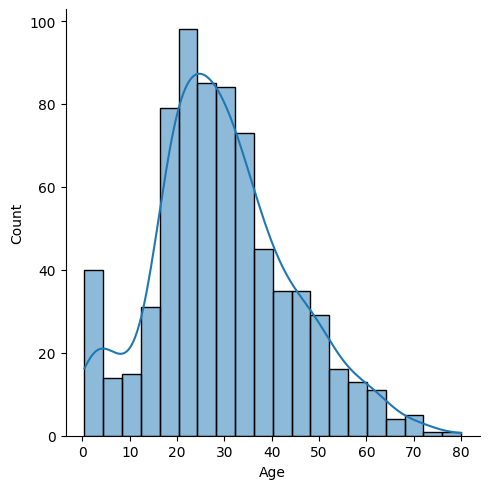

In [242]:
sns.displot(df_train['Age'], kde=True)

<Figure size 1500x1500 with 0 Axes>

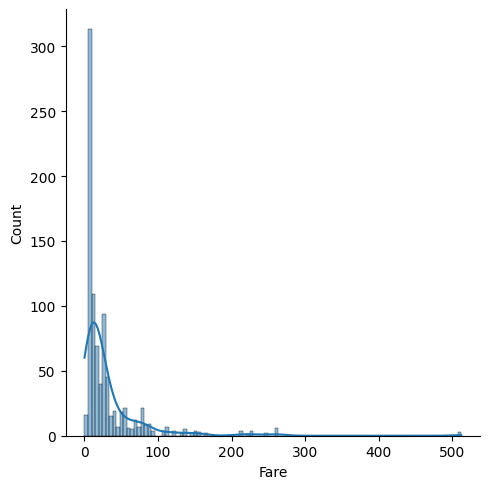

In [243]:
plt.figure(figsize=(15,15))
sns.displot(df_train['Fare'], kde=True)

In [244]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [245]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [246]:
#C = Cherbourg, Q = Queenstown, S = Southampton
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


<Axes: xlabel='Sex', ylabel='Survived'>

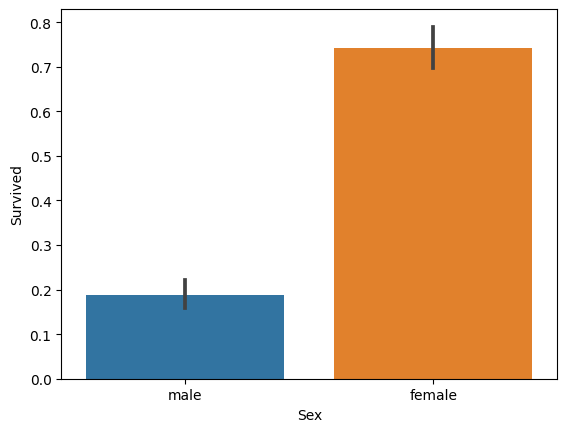

In [247]:
sns.barplot(x='Sex', y='Survived', data=df_train)

<Axes: xlabel='Embarked', ylabel='Fare'>

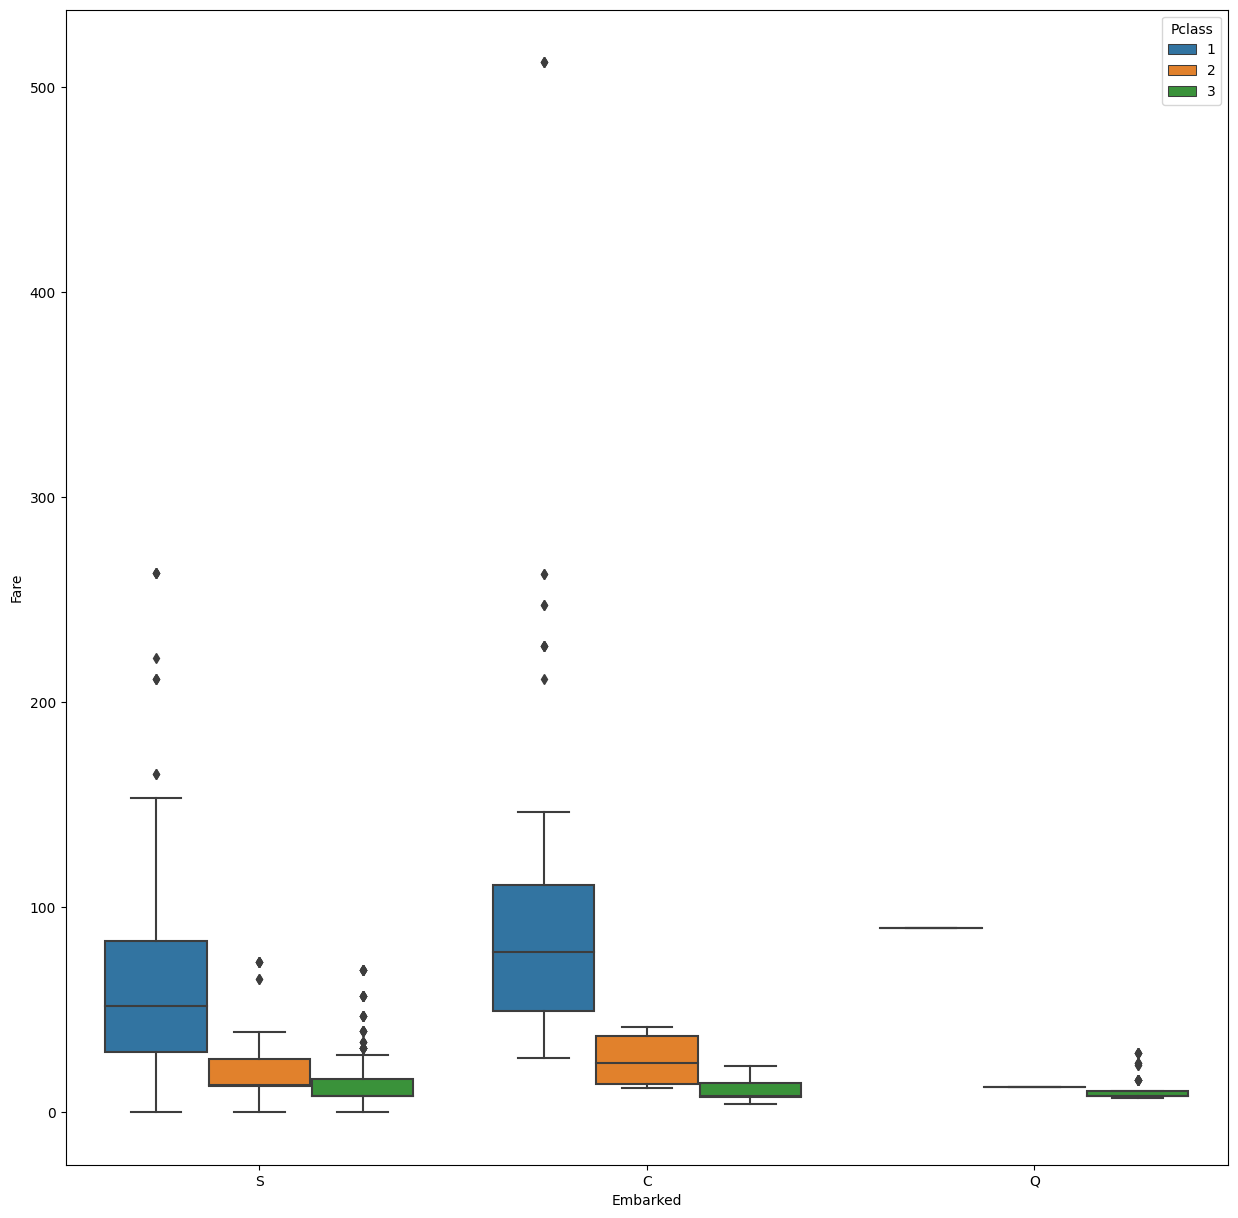

In [248]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=df_train)

<Figure size 1200x1200 with 0 Axes>

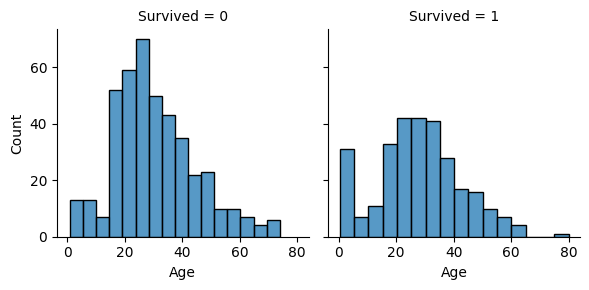

In [249]:
plt.figure(figsize=(12,12))
Agewise = sns.FacetGrid(df_train, col='Survived')
Agewise.map(sns.histplot, 'Age')

<Figure size 1200x1200 with 0 Axes>

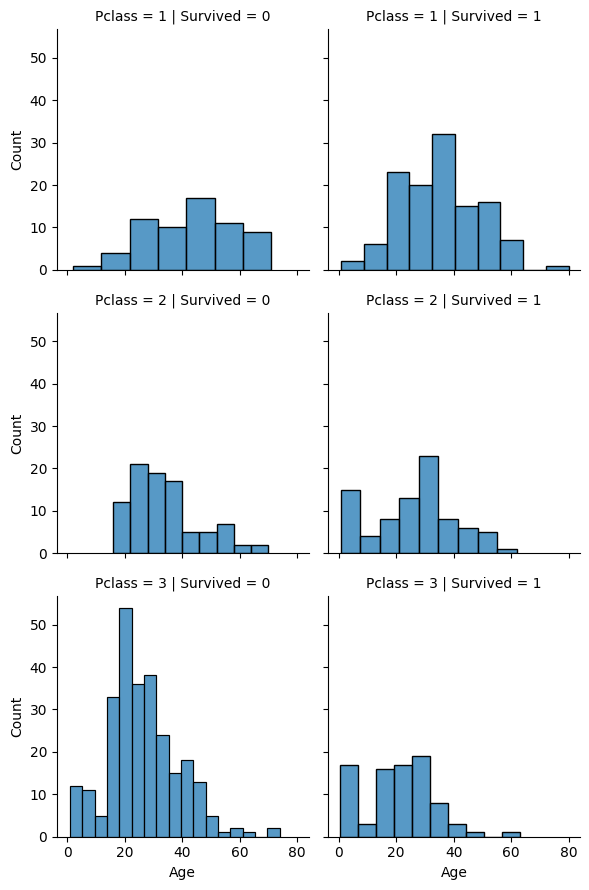

In [250]:
plt.figure(figsize=(12,12))
classwise = sns.FacetGrid(df_train, col='Survived', row='Pclass')
classwise.map(sns.histplot, 'Age')

d:\anaconda3\envs\IRP-env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\anaconda3\envs\IRP-env\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


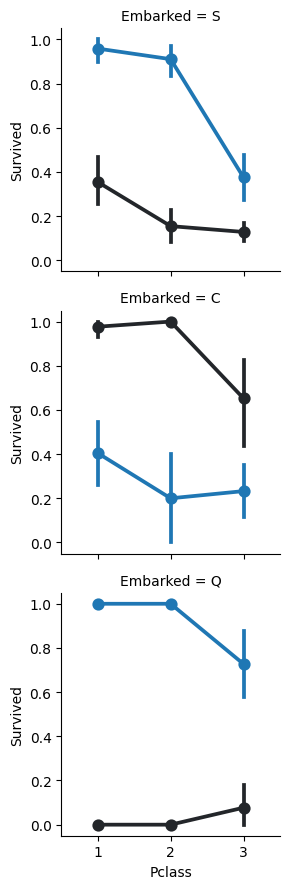

In [251]:
embarkedwise= sns.FacetGrid(df_train, row='Embarked')
embarkedwise.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')

d:\anaconda3\envs\IRP-env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


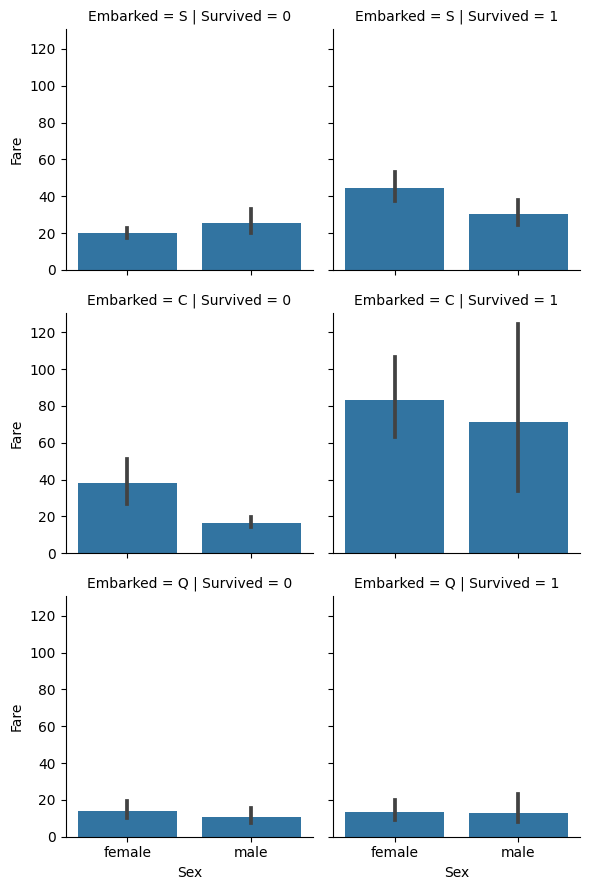

In [252]:
Farewise= sns.FacetGrid(df_train, col='Survived', row='Embarked')
Farewise.map(sns.barplot, 'Sex', 'Fare')

In [253]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [255]:
df_train=df_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [256]:
print(df_train['Age'].mean())
print(df_train['Age'].median())

29.69911764705882
28.0


In [257]:
df_train['Age']= df_train['Age'].fillna(df_train['Age'].median())

In [258]:
df_train['Age'].isna().sum()

0

In [259]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [260]:
df_train['Embarked'].mode()[0] #Indexing Important as it is a categorical value and mode is better option for categorical value

'S'

In [261]:
df_train['Embarked']= df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [262]:
df_train['Embarked'].isna().sum()

0

In [263]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [264]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [265]:
df_train['Embarked'] = df_train['Embarked'].map({'S':0, 'C':1, 'Q':2})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [266]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

In [267]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [268]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [269]:
df1 = pd.read_csv('test.csv')
df_truth = pd.read_csv('gender_submission.csv')
df_test = pd.merge(df1, df_truth, on='PassengerId')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [270]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [271]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [272]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [273]:
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'S':0, 'C':1, 'Q':2})
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,1


In [316]:
X_test = df_test.drop(['Survived'],axis=1)
y_test = df_test['Survived']

# Logistic Regression 

In [275]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [318]:
y_pred = logreg.predict(X_test)
y_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Parch
- SibSp
Feature names seen at fit time, yet now missing:
- FamilySize
- Title


In [276]:
logreg.score(X_train, y_train)

0.8041733547351525

In [277]:
round(logreg.score(X_train, y_train)*100, 2)

80.42

In [278]:
round(logreg.score(X_test, y_test)*100, 2)

80.6

# Random Forest Classifier

In [279]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 5)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [280]:
rfc.score(X_train, y_train)

0.869983948635634

In [281]:
round(rfc.score(X_train, y_train)*100, 2)

87.0

In [282]:
round(rfc.score(X_test, y_test)*100, 2)

82.84

# Data Analysis with Feature Engineering 

In [283]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
df2 = df.drop(['PassengerId', 'Ticket', 'Cabin'],axis=1)
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [285]:
df2['Name'].str.extract('([A-Za-z]+)\.', expand=False) #used to extract only the Mr and Miss in the name

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [286]:

df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [287]:
target_column_index = 1
new_column_name = 'Title'
df2.insert(target_column_index+1, new_column_name, df2['Name'].str.extract('([A-Za-z]+)\.', expand=False))

In [288]:
df2.head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,Mr,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [289]:
df2['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [290]:
df2['Title'] = df2['Title'].replace(['Lady', 'Capt', 'Dr', 'Jonkheer','Countess', 'Don', 'Col', 'Rev', 'Sir', 'Major'], 'Rare')

In [291]:
df2['Title'] = df2['Title'].replace(['Mme', 'Ms', 'Mlle'], 'Mrs')

In [292]:
df2['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       129
Master     40
Rare       23
Name: count, dtype: int64

In [293]:
df2[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.697802
3,Mrs,0.798450


<Axes: xlabel='Title', ylabel='Survived'>

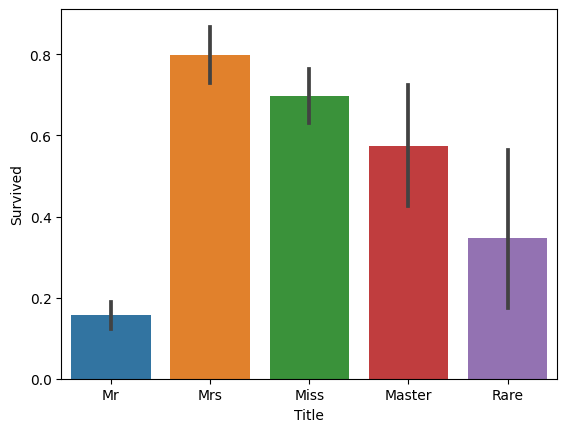

In [294]:
sns.barplot(x='Title', y='Survived', data=df2)

In [295]:
df2['Title']= df2['Title'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rare':5})

In [296]:
df2['Sex'] = df2['Sex'].map({'male':0, 'female':1})

In [297]:
df2.head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,1,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [298]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Title     891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    int64  
 5   Age       714 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [299]:
df2 = df2.drop(['Name'], axis=1)

In [300]:
df2.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,22.0,1,0,7.2500,S
1,1,1,2,1,38.0,1,0,71.2833,C
2,1,3,3,1,26.0,0,0,7.9250,S
3,1,1,2,1,35.0,1,0,53.1000,S
4,0,3,1,0,35.0,0,0,8.0500,S


In [301]:
df2['FamilySize'] = df2['SibSp']+df2['Parch']+1

In [302]:
df2=df2.drop(['SibSp', 'Parch'], axis=1)

In [303]:
df2.head()

,Survived,Pclass,Title,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,0,22.0,7.2500,S,2
1,1,1,2,1,38.0,71.2833,C,2
2,1,3,3,1,26.0,7.9250,S,1
3,1,1,2,1,35.0,53.1000,S,2
4,0,3,1,0,35.0,8.0500,S,1


In [304]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2['Embarked']= df2['Embarked'].fillna(df2['Embarked'].mode()[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Title       891 non-null    int64  
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    object 
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [305]:
df2['Embarked'] = df2['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [306]:
X= df2.drop('Survived', axis=1)
y =df2['Survived']

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [308]:
X_train.head()

,Pclass,Title,Sex,Age,Fare,Embarked,FamilySize
445,1,4,0,4.0,81.8583,0,3
650,3,1,0,28.0,7.8958,0,1
172,3,3,1,1.0,11.1333,0,3
450,2,1,0,36.0,27.7500,0,4
314,2,1,0,43.0,26.2500,0,3


In [309]:
y_train.head()

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

# Logistic Regression

In [310]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

# Training Score

In [311]:
round(logreg.score(X_train, y_train)*100, 2)

80.42

# Test Score

In [312]:
round(logreg.score(X_test, y_test)*100, 2)

80.6

# Random Forest

In [313]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

# Training Score

In [314]:
round(rfc.score(X_train, y_train)*100, 2)

83.95

# Test Score

In [315]:
round(rfc.score(X_test, y_test)*100, 2)

82.09